In [1]:
from dataloader.nyuv2 import getTrainingTestingData
import os
import torch
import torch.nn as nn
from models.mymodel import MyModel
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
trainloader, testloader = getTrainingTestingData('/HDD1/mvpservereight/minhyeok/NYUV2/nyu_data.zip', batch_size=1)

Loading dataset zip file...Loaded (50688).


In [4]:
model = MyModel(max_depth=10, encoder_pretrained=False)

checkpoint = torch.load("./ckpt_5.pth")
torch.nn.Module.load_state_dict(model, checkpoint['model_state_dict'])

<All keys matched successfully>

In [5]:
print(len(testloader))

654


In [6]:
def image_gradients(img):
    img_shape = img.shape
    batch_size, channels, height, width = img.shape
  
    dy = img[:, :, 1:, :] - img[:, :, :-1, :]
    dx = img[:, :, :, 1:] - img[:, :, :, :-1]

    shape = np.stack([batch_size, channels, 1, width])
    dy = torch.cat([dy, torch.zeros([batch_size, channels, 1, width], dtype=img.dtype)], dim=2)
    dy = dy.view(img_shape)

    shape = np.stack([batch_size, channels, height, 1])
    dx = torch.cat([dx, torch.zeros([batch_size, channels, height, 1], dtype=img.dtype)], dim=3)
    dx = dx.view(img_shape)

    return dy + dx

tensor(-0.1456, grad_fn=<MaxBackward1>) tensor(-0.4231, grad_fn=<MinBackward1>)


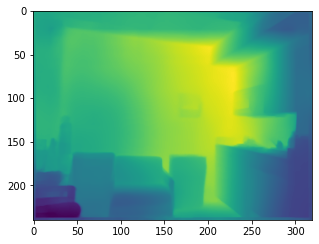

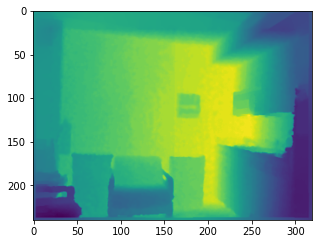

7.9111345e-07 -4.988419e-06


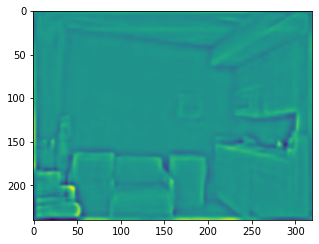

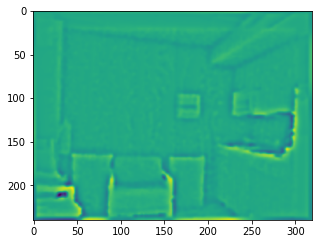

0.79200006 -1.063


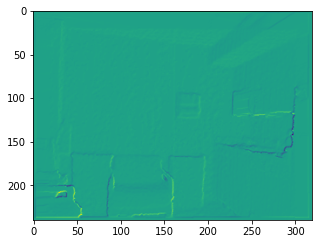

In [14]:
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np
import cv2

model.eval()

for i_batch, sample_batched in enumerate(testloader):

    img_inputs, img_labels = sample_batched["image"], sample_batched["depth"]

    pred_depth, pred_dog, label_dog = model(img_inputs, img_labels)

    grad_depth = image_gradients(pred_depth)
    grad_label = image_gradients(img_labels)

    pred_depth = pred_depth.detach().numpy().squeeze().squeeze()
    img_labels = img_labels.detach().numpy().squeeze().squeeze()
    grad_label = grad_label.detach().numpy().squeeze().squeeze()

    print(torch.max(pred_dog[1]), torch.min(pred_dog[1]))
    pred_dog = pred_dog[3].detach().numpy().squeeze().squeeze()
    label_dog = label_dog[3].detach().numpy().squeeze().squeeze()

    plt.figure(figsize=(5, 5))
    plt.imshow(pred_depth)
    plt.show()

    plt.figure(figsize=(5, 5))
    plt.imshow(img_labels)
    plt.show()

    print(np.max(pred_dog), np.min(pred_dog))
    plt.figure(figsize=(5, 5))
    plt.imshow(pred_dog)
    plt.show()

    plt.figure(figsize=(5, 5))
    plt.imshow(label_dog)
    plt.show()

    print(np.max(grad_label), np.min(grad_label))
    plt.figure(figsize=(5, 5))
    plt.imshow(grad_label)
    plt.show()

    break
